In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from ipywidgets import interact
from folium import Choropleth
from IPython.display import display         

In [2]:
# == SHAPEFILES == 
crs = 'EPSG:27700'
london_boundary = gpd.read_file('data/boundaries/greater london boundary/London_GLA_Boundary.shp').to_crs(crs)
wards_2018 = gpd.read_file('data/boundaries/ward boundaries 2018/London_Ward_CityMerged.shp').to_crs(crs)
wards_2022_all = gpd.read_file('data/boundaries/ward boundaries 2022/').to_crs(crs)
wards_2022 = gpd.clip(wards_2022_all, london_boundary)
centroids = gpd.read_file('data/raw/LLSOA_Dec_2021_PWC_for_England_and_Wales_2022_4975765757449378936/LSOA_PopCentroids_EW_2021_V3.shp').to_crs(crs)

In [3]:
def merge_city_of_london(gdf):
    """Merges the City of London wards into one area."""
    # find City of London ward(s)
    city_of_london_wards = gdf[gdf['LAD22NM'] == "City of London"]
    
    # dissolve the City of London wards into one
    city_of_london_merged = city_of_london_wards.dissolve().reset_index(drop=True)

    # remove the original separate City of London wards and merge the dissolved one
    wards_2022_merged = gdf[gdf['LAD22NM'] != "City of London"]
    return pd.concat([wards_2022_merged, city_of_london_merged])

wards_2022 = merge_city_of_london(wards_2022)

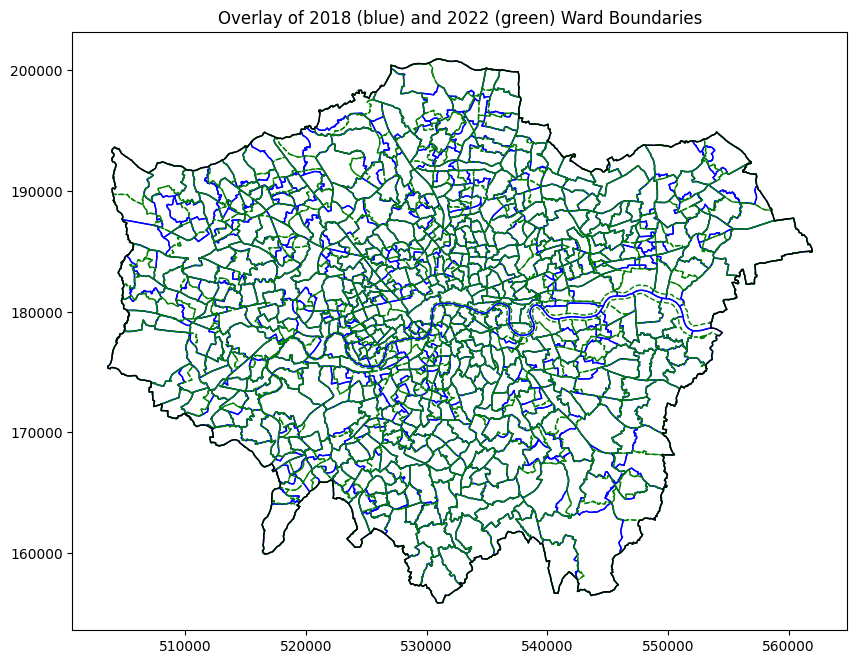

In [4]:
# == COMPARE 2018 WARDS WITH 2022 WARDS == 
# create a single plot
fig, ax = plt.subplots(figsize=(10, 10))

# plot 2018 ward boundaries
wards_2018.plot(ax=ax, color='none', edgecolor='blue', linewidth=1, label='2018 Wards')

# plot 2022 ward boundaries
wards_2022.plot(ax=ax, color='none', edgecolor='green', linewidth=1, linestyle='--', label='2022 Wards')

london_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

ax.set_title('Overlay of 2018 (blue) and 2022 (green) Ward Boundaries')

# save figure
fig.savefig("outputs/images/compare_2018_2022_wards.png")
plt.show()

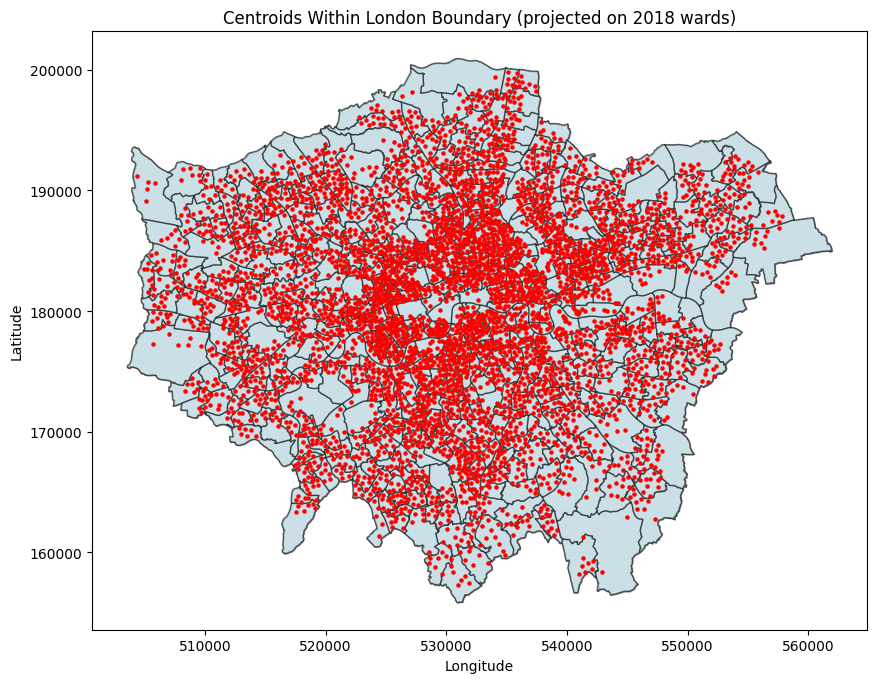

In [5]:
# == POPULATION WEIGHTED CENTROIDS IN LONDON FOR 2018 WARDS == 

# filter centroids that fall within the same london boundary
centroids_london = centroids[centroids.geometry.within(london_boundary.union_all())]

# save to shapefile
centroids_london.to_file('data/boundaries/lsoa population weighted centroids 2021/centroids_within_london.shp')

# plot the London boundary and centroids
fig, ax = plt.subplots(figsize=(10, 10))

# plot the London boundary
london_boundary.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# plot wards
wards_2018.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# plot the centroids
centroids_london.plot(ax=ax, color='red', marker='o', markersize=5)

ax.set_title('Centroids Within London Boundary (projected on 2018 wards)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# save fig
fig.savefig('outputs/images/population_weighted_centroids.png')

plt.show()


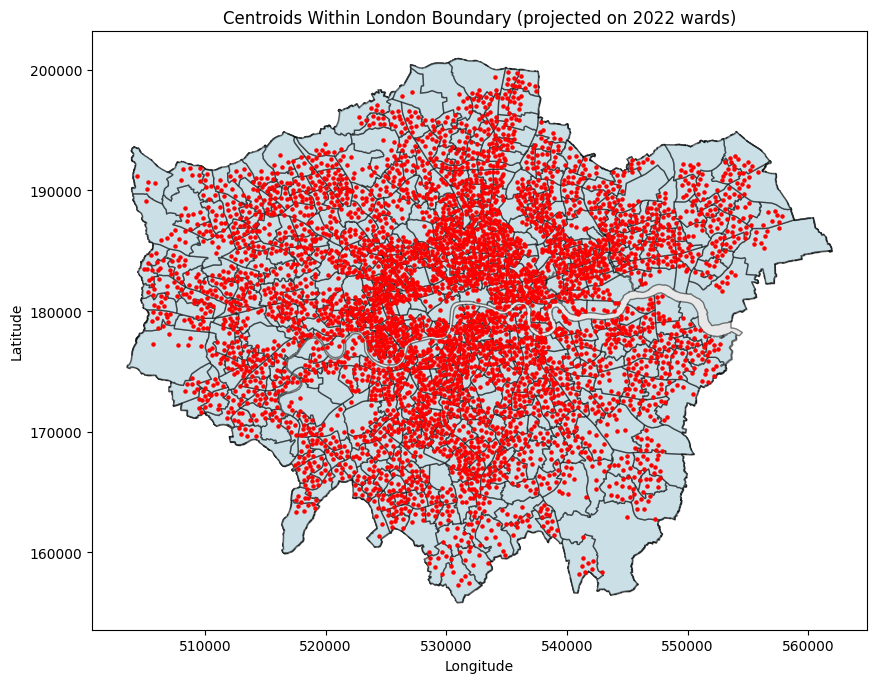

In [64]:
# == POPULATION WEIGHTED CENTROIDS IN LONDON FOR 2022 WARDS == 

# filter centroids that fall within the same london boundary
centroids_london = centroids[centroids.geometry.within(london_boundary.union_all())]

# save to shapefile
centroids_london.to_file('data/boundaries/lsoa population weighted centroids 2021/centroids_within_london.shp')

# plot the London boundary and centroids
fig, ax = plt.subplots(figsize=(10, 10))

# plot the London boundary
london_boundary.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# plot wards
wards_2022.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# plot the centroids
centroids_london.plot(ax=ax, color='red', marker='o', markersize=5)

ax.set_title('Centroids Within London Boundary (projected on 2022 wards)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# save fig
fig.savefig('outputs/images/population_weighted_centroids.png')

plt.show()
